# Noah Cina D208 Performance Assessment

## Task 1

         CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  49153.319600     38.757567    -90.782536    9756.562400   
std     2886.89568  27532.196108      5.437389     15.156142   14432.698671   
min        1.00000    601.000000     17.966120   -171.688150       0.000000   
25%     2500.75000  26292.500000     35.341828    -97.082812     738.000000   
50%     5000.50000  48869.500000     39.395800    -87.918800    2910.500000   
75%     7500.25000  71866.500000     42.106908    -80.088745   13168.000000   
max    10000.00000  99929.000000     70.640660    -65.667850  111850.000000   

         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min     

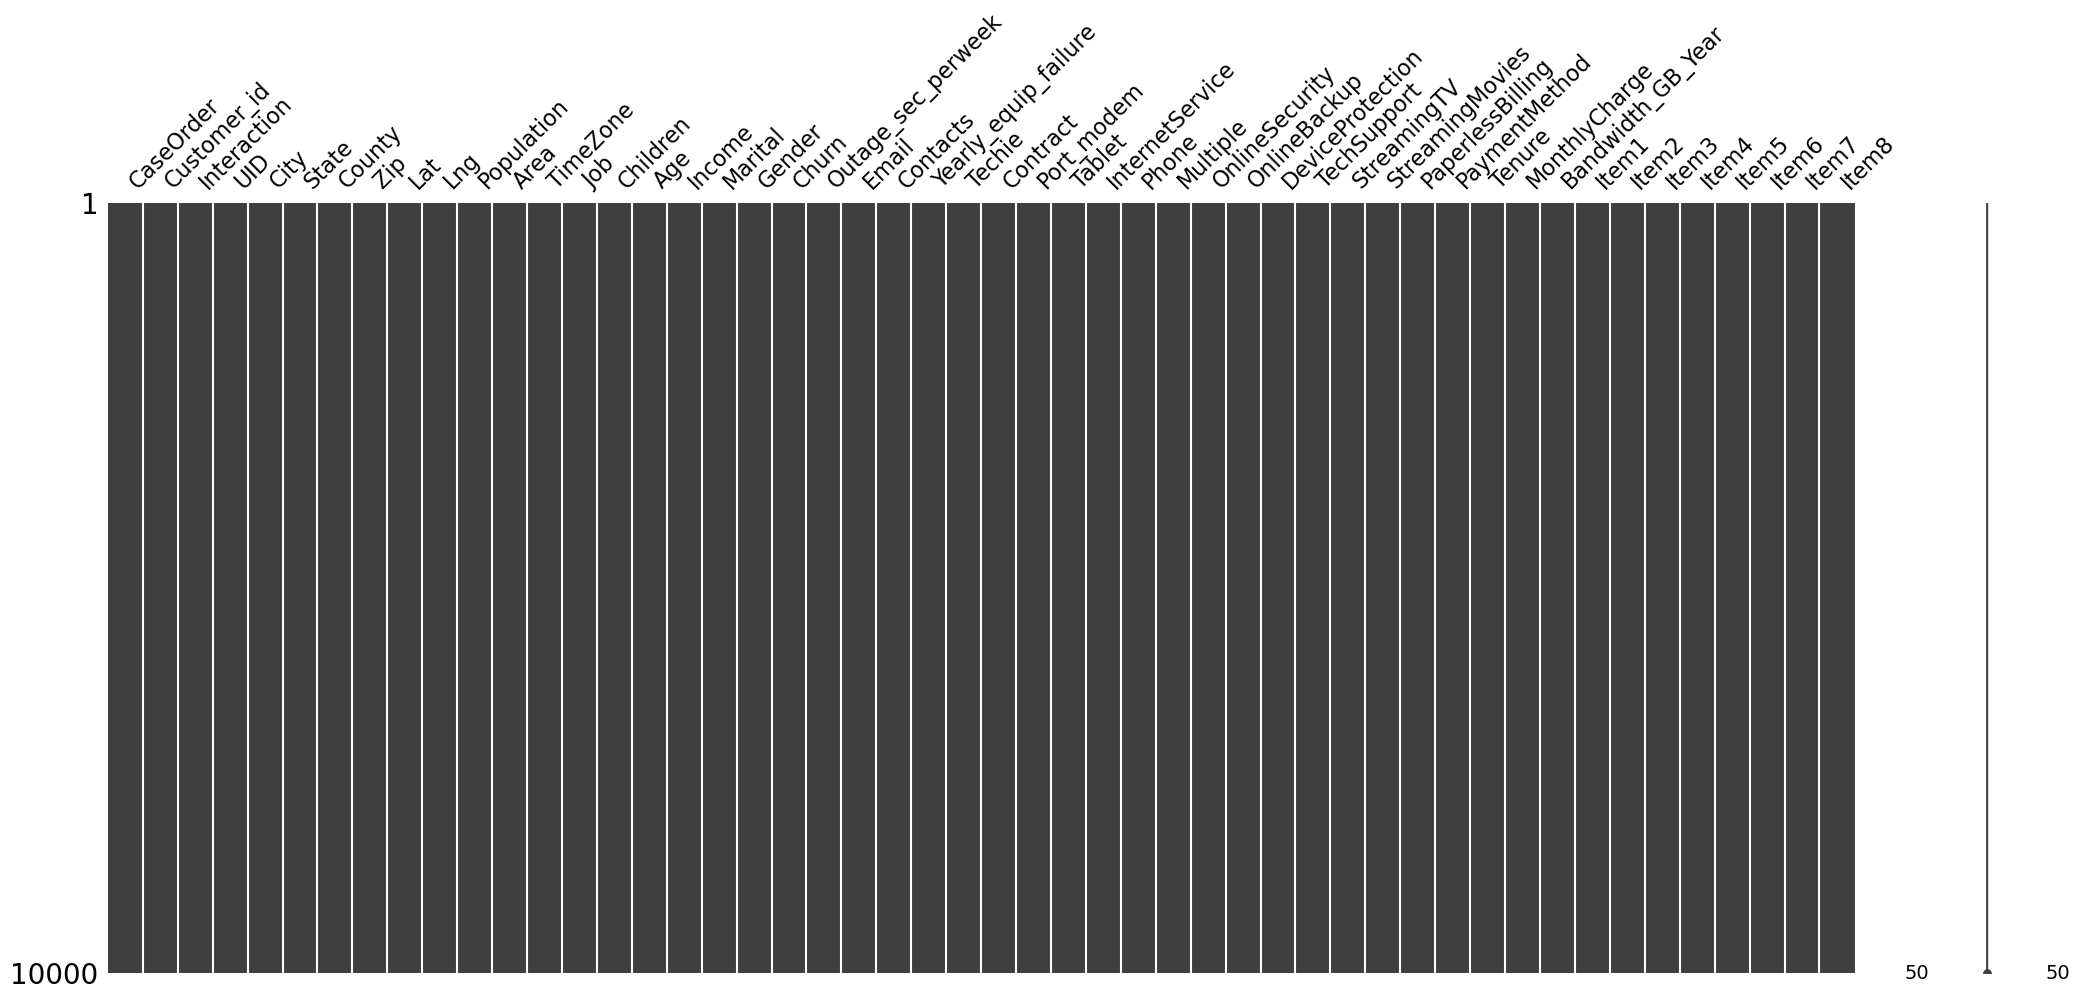

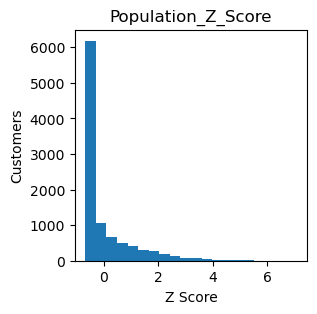

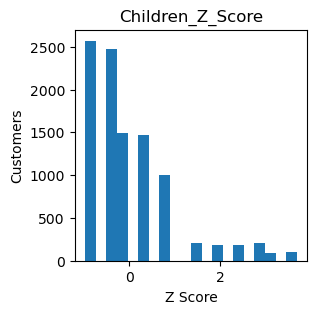

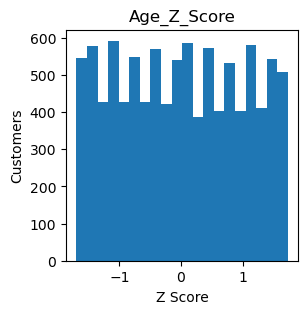

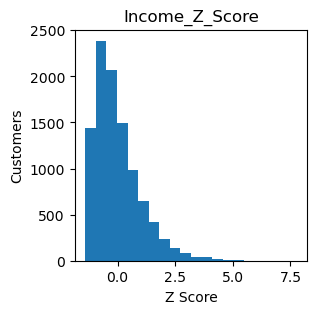

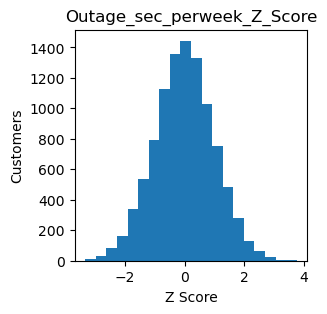

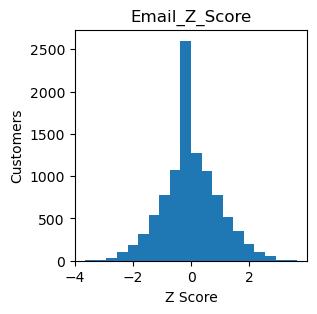

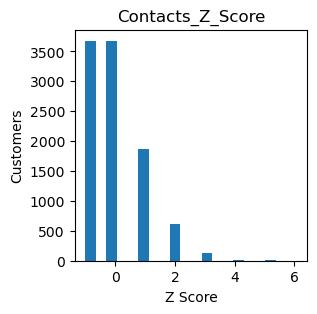

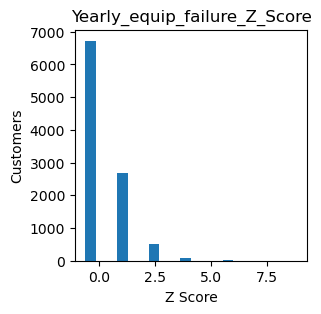

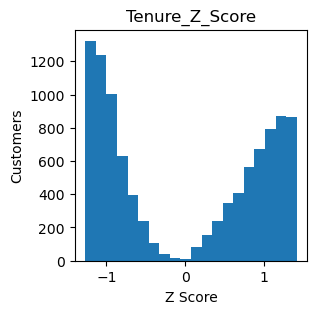

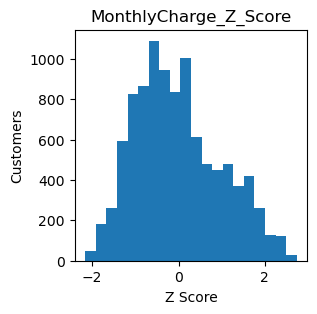

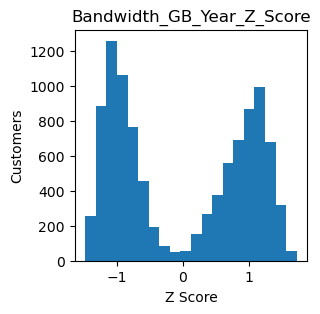

Index([  57,   90,  100,  157,  203,  212,  240,  291,  442,  445,
       ...
       9334, 9450, 9493, 9616, 9623, 9647, 9728, 9905, 9987, 9996],
      dtype='int64', length=219)
Index([  30,   97,  144,  329,  334,  346,  358,  359,  417,  480,
       ...
       9481, 9523, 9585, 9586, 9594, 9599, 9676, 9790, 9871, 9901],
      dtype='int64', length=186)
Index([], dtype='int64')
Index([  46,  130,  186,  470,  511,  513,  623,  656,  685,  688,
       ...
       9233, 9249, 9294, 9348, 9428, 9615, 9639, 9656, 9849, 9876],
      dtype='int64', length=138)
Index([ 527,  868,  908, 1022, 1334, 1904, 1997, 2250, 2927, 2984, 3629, 4184,
       4190, 4427, 4562, 4697, 5363, 5392, 5680, 6093, 6463, 7953, 8194, 8539,
       8643, 9402],
      dtype='int64')
Index([795, 1152, 1381, 1399, 1473, 1746, 6320, 7408, 8365, 8948, 9248, 9475], dtype='int64')
Index([  88,  129,  187,  205,  345,  426,  535,  567,  654,  744,
       ...
       9713, 9744, 9750, 9755, 9757, 9799, 9805, 9828, 9923, 9972],

In [1]:
#Part C1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9
import missingno as msno
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

csv = pd.read_csv("churn_clean.csv", keep_default_na=False)
print(csv.describe(), "\n")

#Detect missing values
msno.matrix(csv)

#Detecting duplicate values
print("Complete duplicates:")
print(csv.duplicated().value_counts(), "\n")

#Detecting Outliers
#list of numerical columns to enumerate over
col_list = csv.select_dtypes(include='number').columns
col_list = col_list.drop(["CaseOrder", "Zip", "Lat", "Lng", "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"])

csv_z_scores = pd.DataFrame()

plt.rcParams["figure.figsize"] = (3, 3)

for col in csv[col_list]:
    #generate z score
    colname = '_'.join([col, 'Z_Score'])
    csv_z_scores[colname] = stats.zscore(csv[col], nan_policy='omit')
    #plot
    plt.figure(colname)
    plt.title(colname)
    plt.xlabel("Z Score")
    plt.ylabel("Customers")
    plt.hist(csv_z_scores[colname], bins=20)

plt.show()

#drop all records with significant outliers (z > 3 or z < -3)
for col in csv_z_scores.columns:
    dropIndex = csv_z_scores.loc[(csv_z_scores[col] > 3) | (csv_z_scores[col] < -3), col].index
    print(dropIndex)
    csv.drop(dropIndex, inplace=True)
    csv_z_scores.drop(dropIndex, inplace=True)


In [2]:
#Part C4

#Re-expressing categoricals
categoricals = csv.select_dtypes(include=["object"]).columns
#Drop unneeded columns
categoricals = categoricals.drop(["Customer_id", "Interaction", "UID", "City", "State", "County", "TimeZone", "Job"])

for col in categoricals:
    #encode yes/no values to 1/0
    if csv.at[0, col] == "Yes" or csv.at[0, col] == "No":
        csv[col] = csv[col].map({"Yes" : 1, "No" : 0}).astype('bool')
        categoricals = categoricals.drop([col])
    #one-hot encode everything else
    else:
        csv = pd.concat([csv, pd.get_dummies(csv[col], prefix=col)], axis=1)
        
#drop original columns
csv.drop(columns=categoricals, inplace=True)
csv.drop(columns=csv.select_dtypes('object').columns, inplace=True)
#drop irrelevant columns
csv.drop(columns=["CaseOrder", "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"], inplace=True)
csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9175 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Zip                                     9175 non-null   int64  
 1   Lat                                     9175 non-null   float64
 2   Lng                                     9175 non-null   float64
 3   Population                              9175 non-null   int64  
 4   Children                                9175 non-null   int64  
 5   Age                                     9175 non-null   int64  
 6   Income                                  9175 non-null   float64
 7   Churn                                   9175 non-null   bool   
 8   Outage_sec_perweek                      9175 non-null   float64
 9   Email                                   9175 non-null   int64  
 10  Contacts                                9175 non-null   int64  
 

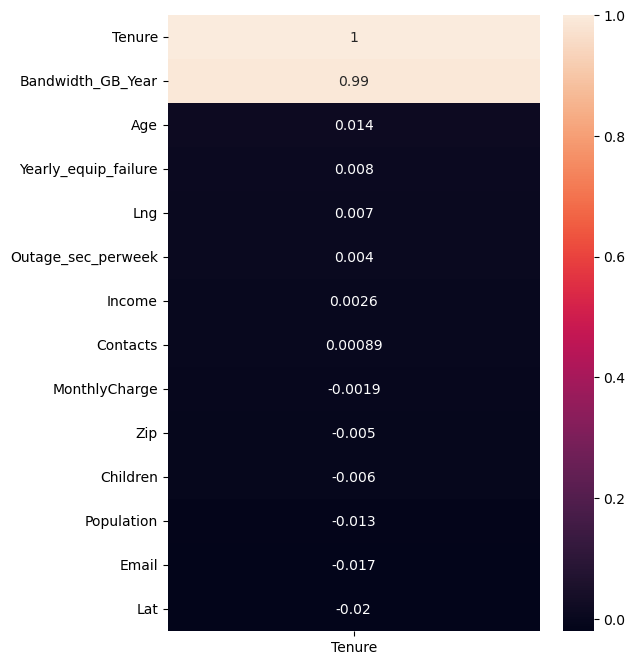

Churn : SignificanceResult(statistic=-0.4872779408620662, pvalue=0.0) 

DeviceProtection : SignificanceResult(statistic=-0.028887579265841005, pvalue=0.005653442326113819) 

Contract_Two Year : SignificanceResult(statistic=0.02141126882994257, pvalue=0.040280566437549264) 

count    9175.000000
mean       34.440035
std        26.450699
min         1.005104
25%         7.893636
50%        30.177800
75%        61.414785
max        71.999280
Name: Tenure, dtype: float64 

count    9175.000000
mean     3380.574496
std      2186.226165
min       155.506715
25%      1225.876246
50%      3158.141347
75%      5581.680830
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64 

Churn
False    73.449591
True     26.550409
Name: count, dtype: float64 

DeviceProtection
False    56.26158
True     43.73842
Name: count, dtype: float64 

Contract_Two Year
False    75.553134
True     24.446866
Name: count, dtype: float64 



In [3]:
#Part C2

#determine relevant variables through correlation to tenure
fig, ax = plt.subplots(figsize=(6, 8))

#continous correlations
sns.heatmap(csv.select_dtypes(exclude='bool').corr()[['Tenure']].sort_values(by="Tenure", ascending=False), ax=ax, annot=True)
plt.show()

#categorical correlations
for col in csv.select_dtypes(include='bool'):
    values = stats.pointbiserialr(csv[col], csv["Tenure"])
    if values[1] < 0.05: #significant p value
        print(col, ":", values, "\n")

print(csv["Tenure"].describe(), "\n")
print(csv["Bandwidth_GB_Year"].describe(), "\n")

for col in ["Churn", "DeviceProtection", "Contract_Two Year"]:
    print(csv[col].value_counts() / csv[col].shape[0] * 100, "\n")

c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


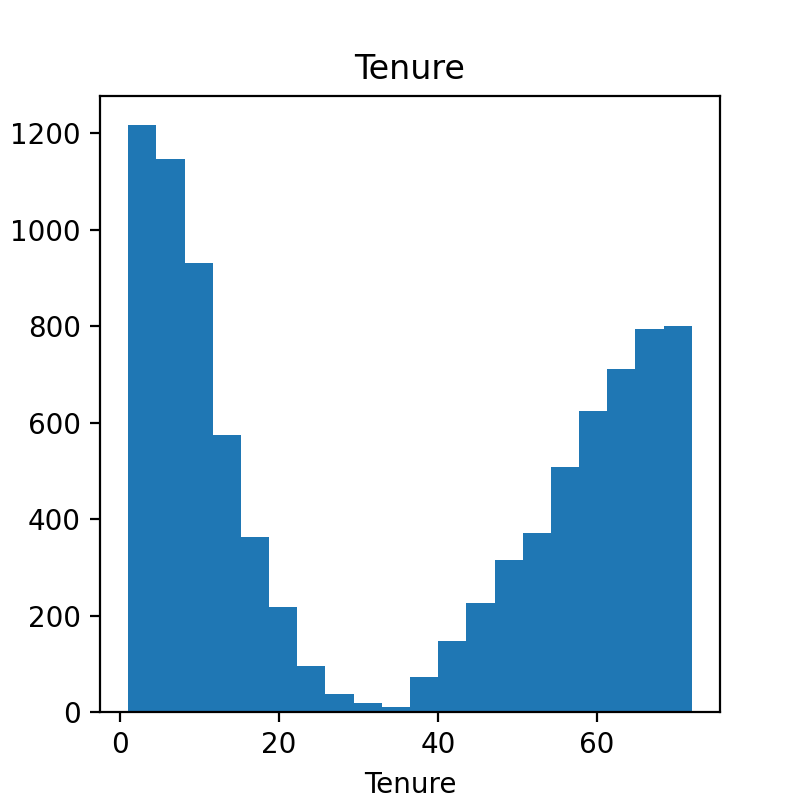

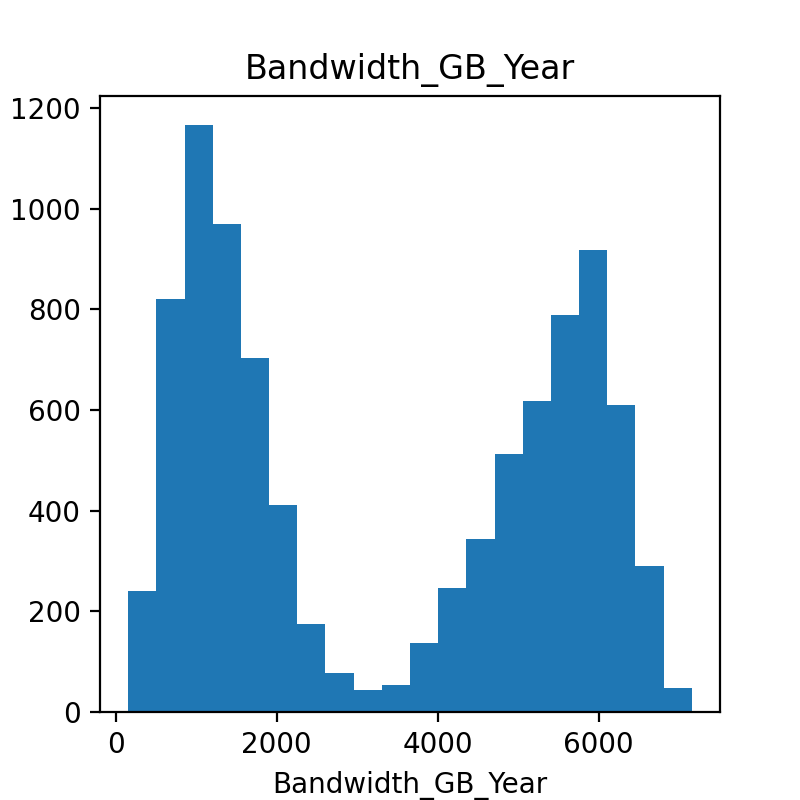

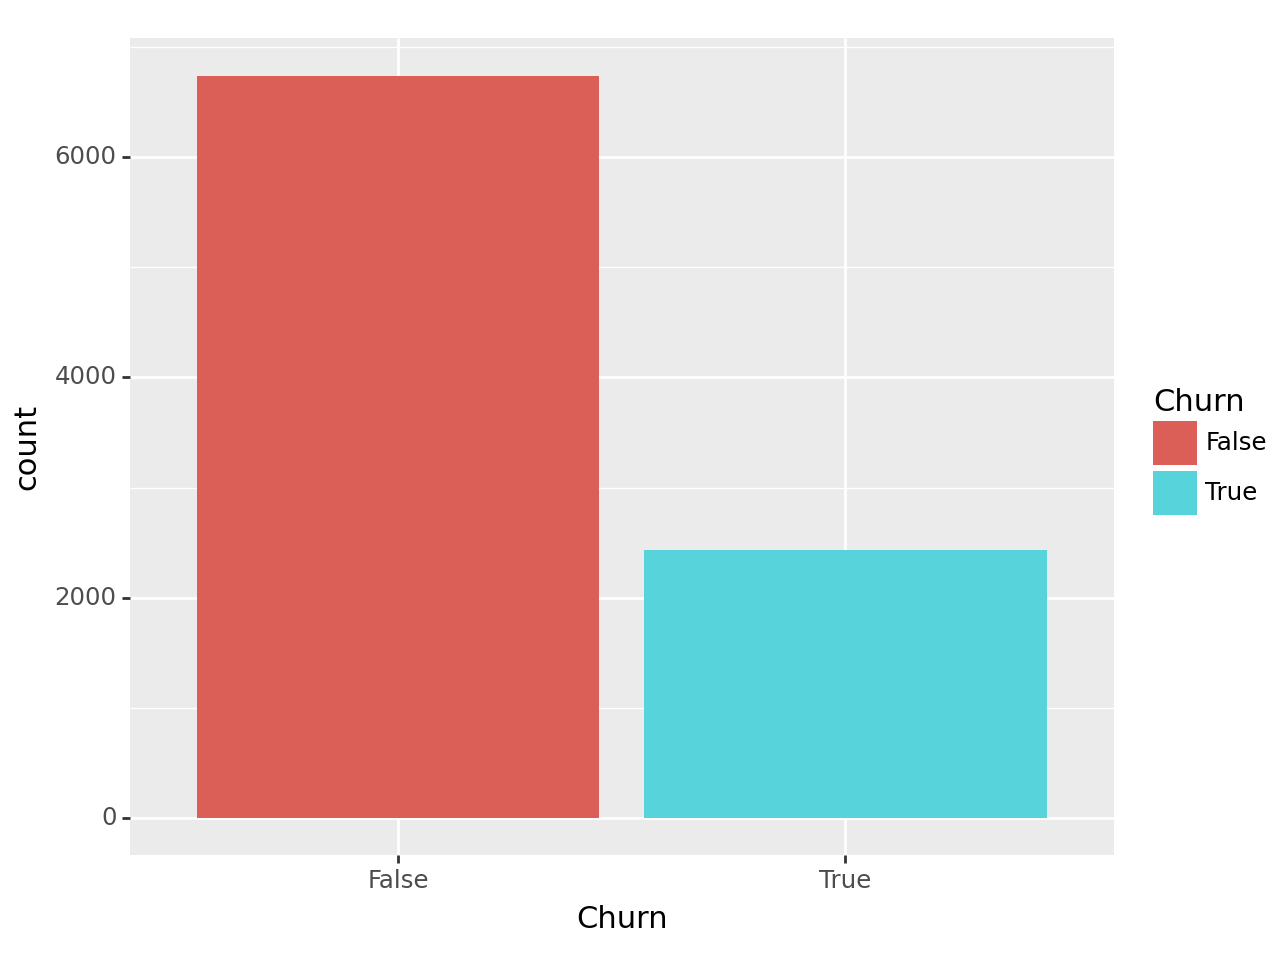

c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


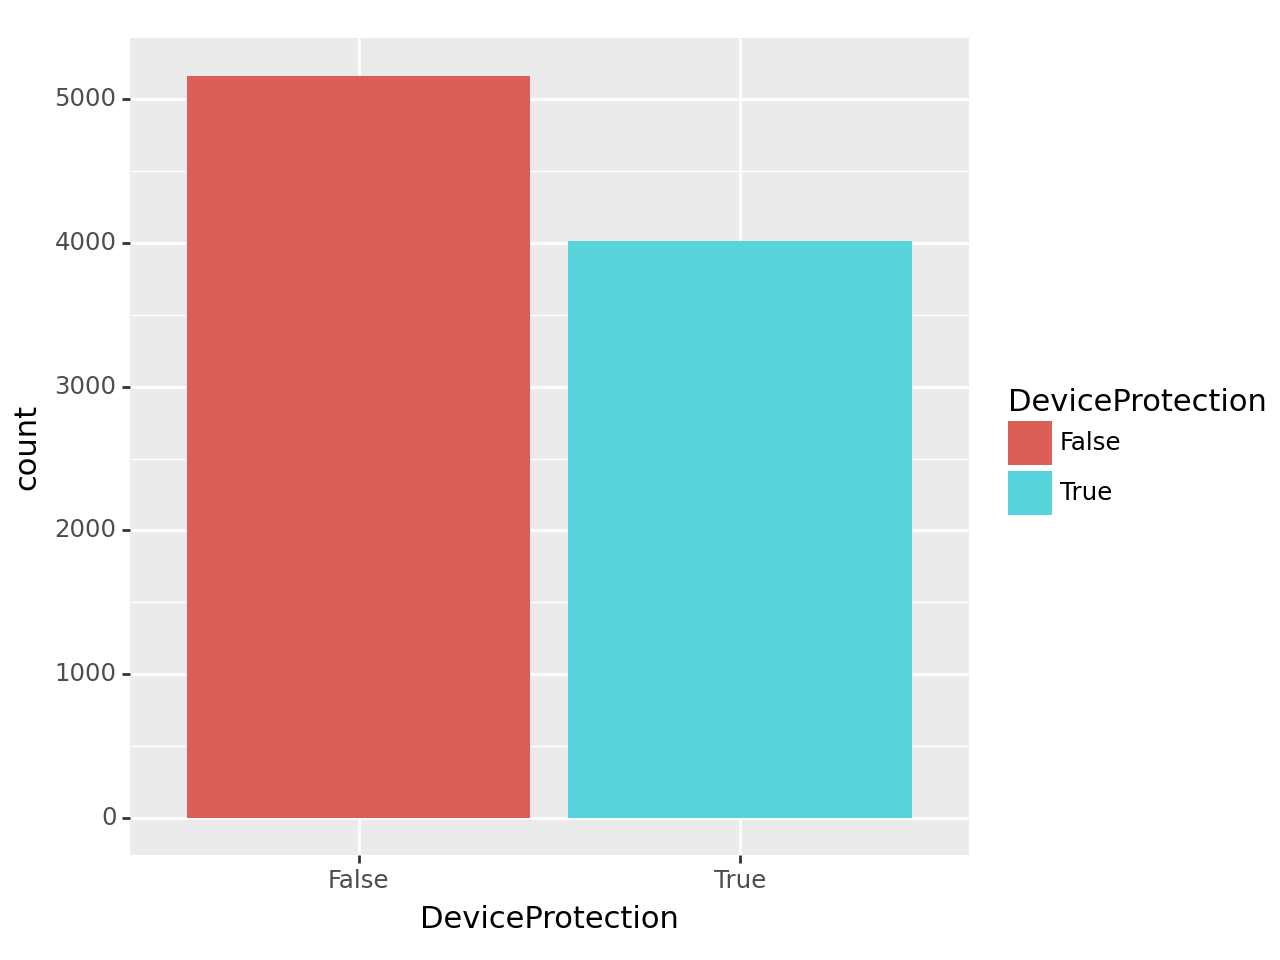

c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002925933C220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


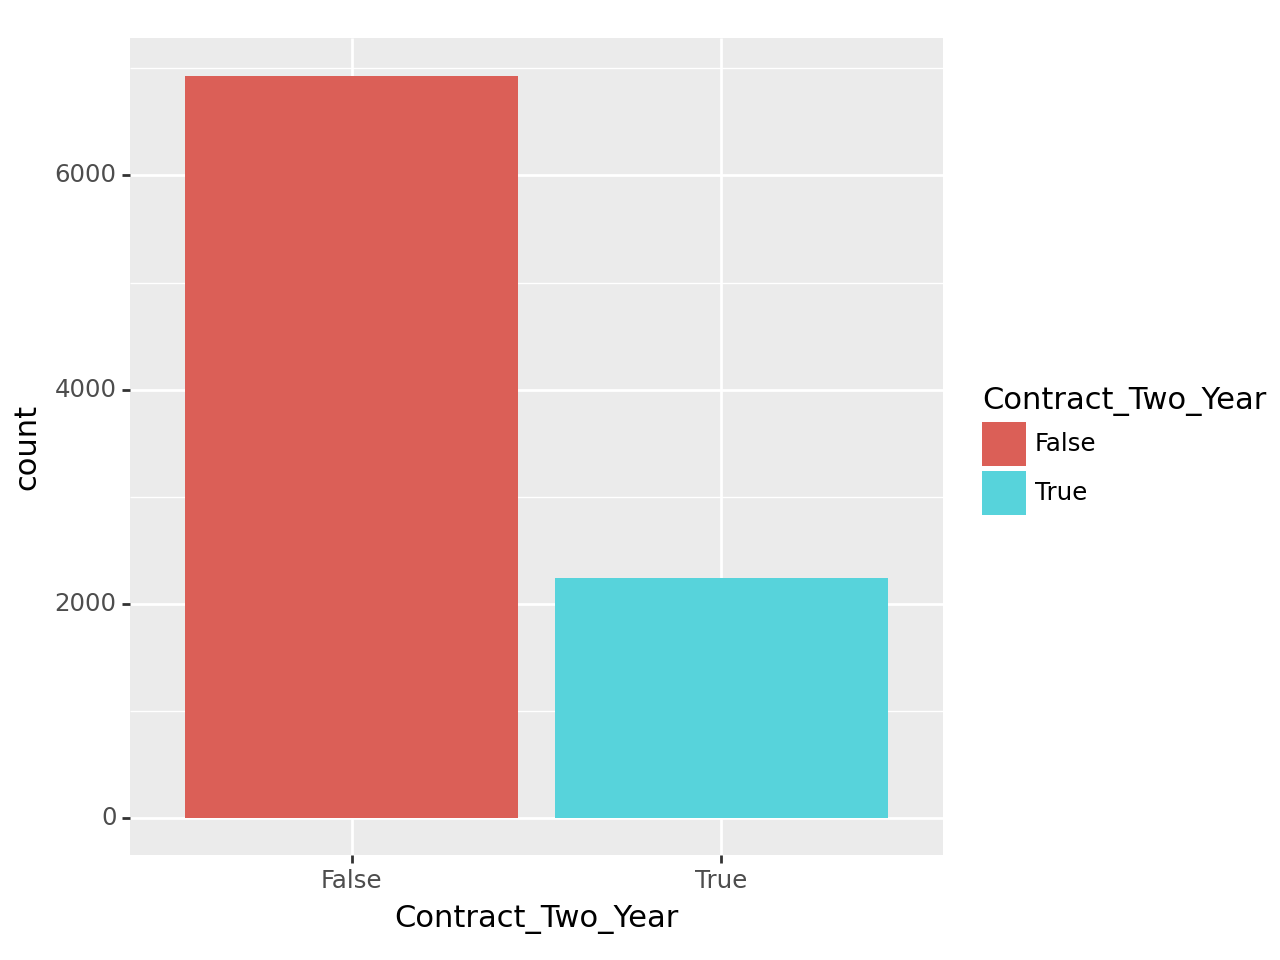

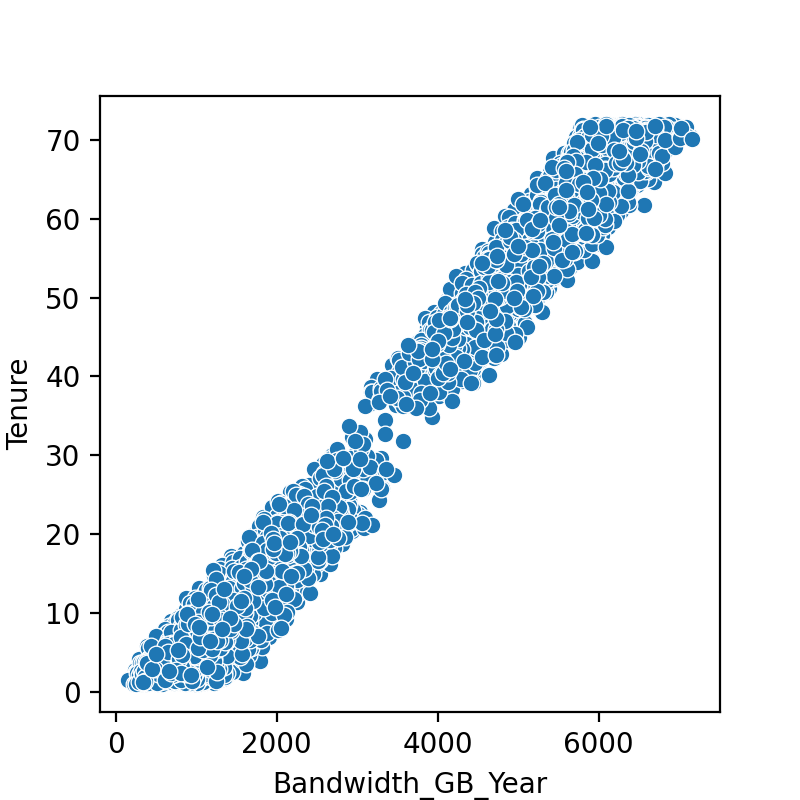

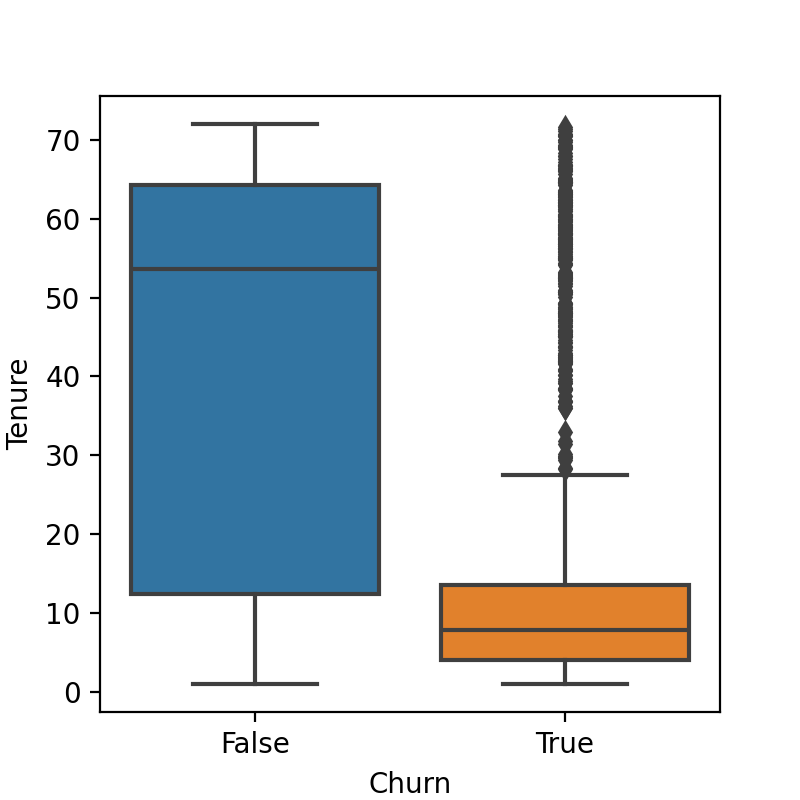

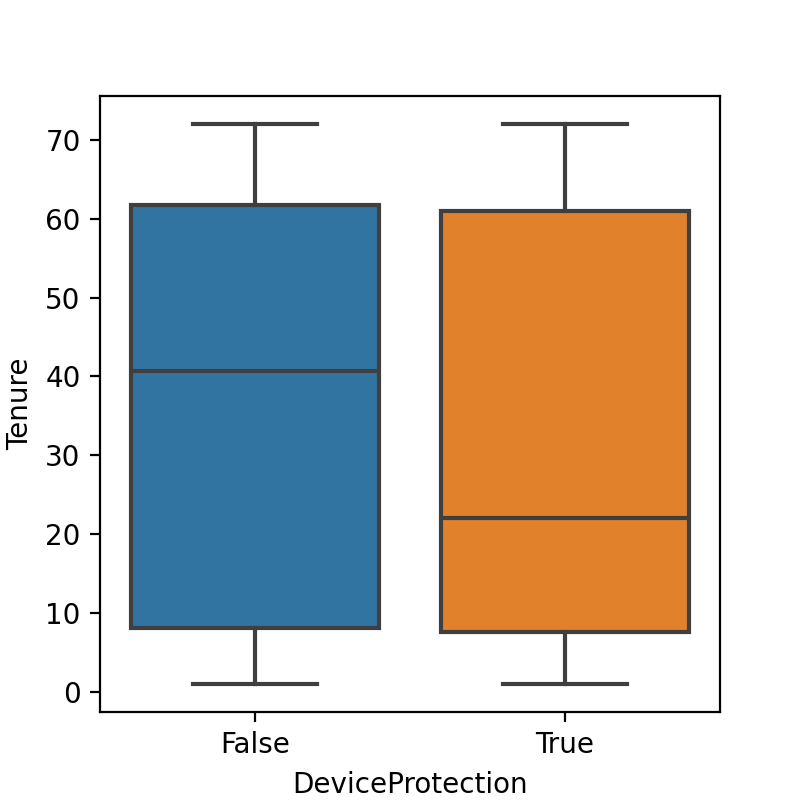

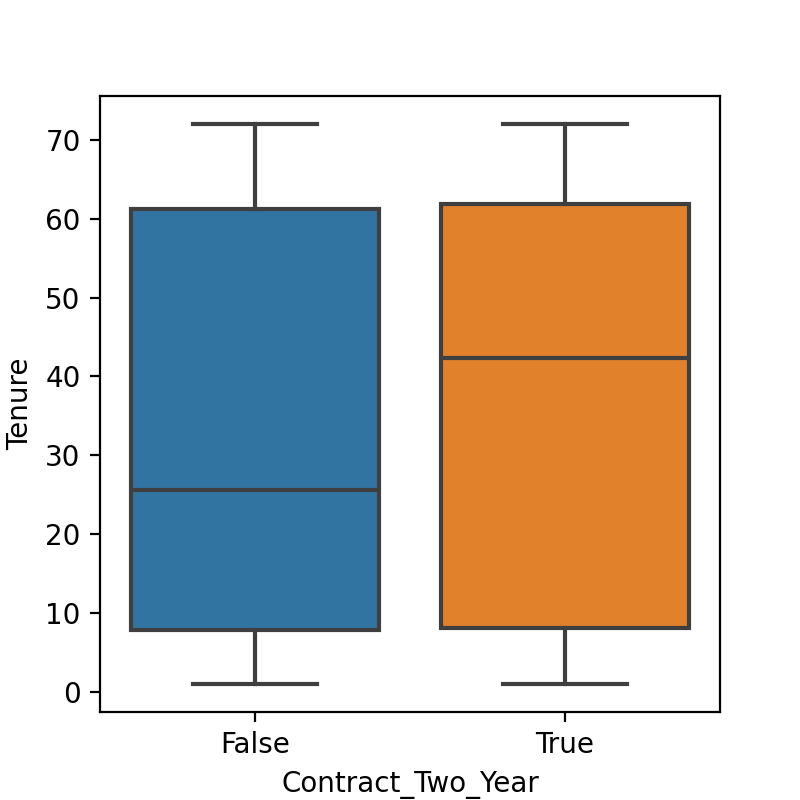

In [4]:
#Part C3

plt.rcParams["figure.figsize"] = (4, 4)

#Univariate visualizations
for col in ["Tenure", "Bandwidth_GB_Year"]:
    plt.figure(col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Customers")
    plt.hist(csv[col], bins=20)

csv.rename(columns={"Contract_Two Year" : "Contract_Two_Year"}, inplace=True)

for col in ["Churn", "DeviceProtection", "Contract_Two_Year"]:
    print(p9.ggplot(csv) + p9.aes(x = col, fill=col) + p9.geom_bar())

#Bivariate visualizations
sns.scatterplot(x="Bandwidth_GB_Year",
                y="Tenure",
                data=csv)

for col in ["Churn", "DeviceProtection", "Contract_Two_Year"]:
    plt.figure(col)
    sns.boxplot(x=col, y="Tenure", data=csv)

In [5]:
#Part C5

csv.to_csv("NCina D208 T1.csv")

In [6]:
#Part D1

#initial model
mlr_model = ols("Tenure ~ Bandwidth_GB_Year + C(Churn) + C(DeviceProtection) + C(Contract_Two_Year)", data=csv).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.665e+05
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        22:05:01   Log-Likelihood:                -23347.
No. Observations:                9175   AIC:                         4.670e+04
Df Residuals:                    9170   BIC:                         4.674e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.4514      0.084    -41.200      0.000      -3.616      -3.287
C(Churn)[T.True]                -3.6482      0.083    -43.994      0.000      -3.811      -3.486
C(DeviceProtection)[T.True]     -0.9497      0.065    -14.611      0.000      -1.077      -0.822
C(Contract_Two_Year)[T.True]    -0.7362      0.076     -9.651      0.000      -0.886      -0.587
Bandwidth_GB_Year                0.0117   1.65e-05    709.012      0.000       0.012       0.012
==============================================================================
Omnibus:                      194.013   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.095
Skew:                          -0.243   Prob(JB):                     1.27e-34
Kurtosis:                       2.586   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#Part D2

#model reduction by VIF
pd.options.mode.copy_on_write = True
csv_vif = csv[["Bandwidth_GB_Year", "Churn", "DeviceProtection", "Contract_Two_Year"]]
#VIF model reduction example case
# csv_vif = csv[["Tenure", "Bandwidth_GB_Year", "Churn", "DeviceProtection", "Contract_Two_Year"]]
csv_vif["Churn"] = csv_vif["Churn"].map({False : 0, True : 1})
csv_vif["DeviceProtection"] = csv_vif["DeviceProtection"].map({False : 0, True : 1})
csv_vif["Contract_Two_Year"] = csv_vif["Contract_Two_Year"].map({False : 0, True : 1})

vif = pd.DataFrame()
vif["Variable Name"] = csv_vif.columns

vif["VIF"] = [variance_inflation_factor(csv_vif.values, i)
              for i in range(len(csv_vif.columns))]

print(vif)

       Variable Name       VIF
0  Bandwidth_GB_Year  1.595988
1              Churn  1.165244
2   DeviceProtection  1.611288
3  Contract_Two_Year  1.239266


In [8]:
#Part E1

print("R Squared:", mlr_model.rsquared)
print("Adjusted R Squared:", mlr_model.rsquared_adj)
print("Residual Standard Error:", np.sqrt(mlr_model.mse_resid))

R Squared: 0.9864190075639651
Adjusted R Squared: 0.9864130834669373
Residual Standard Error: 3.0831709741497555


c:\Users\Mugenri\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


ValueError: output array is read-only

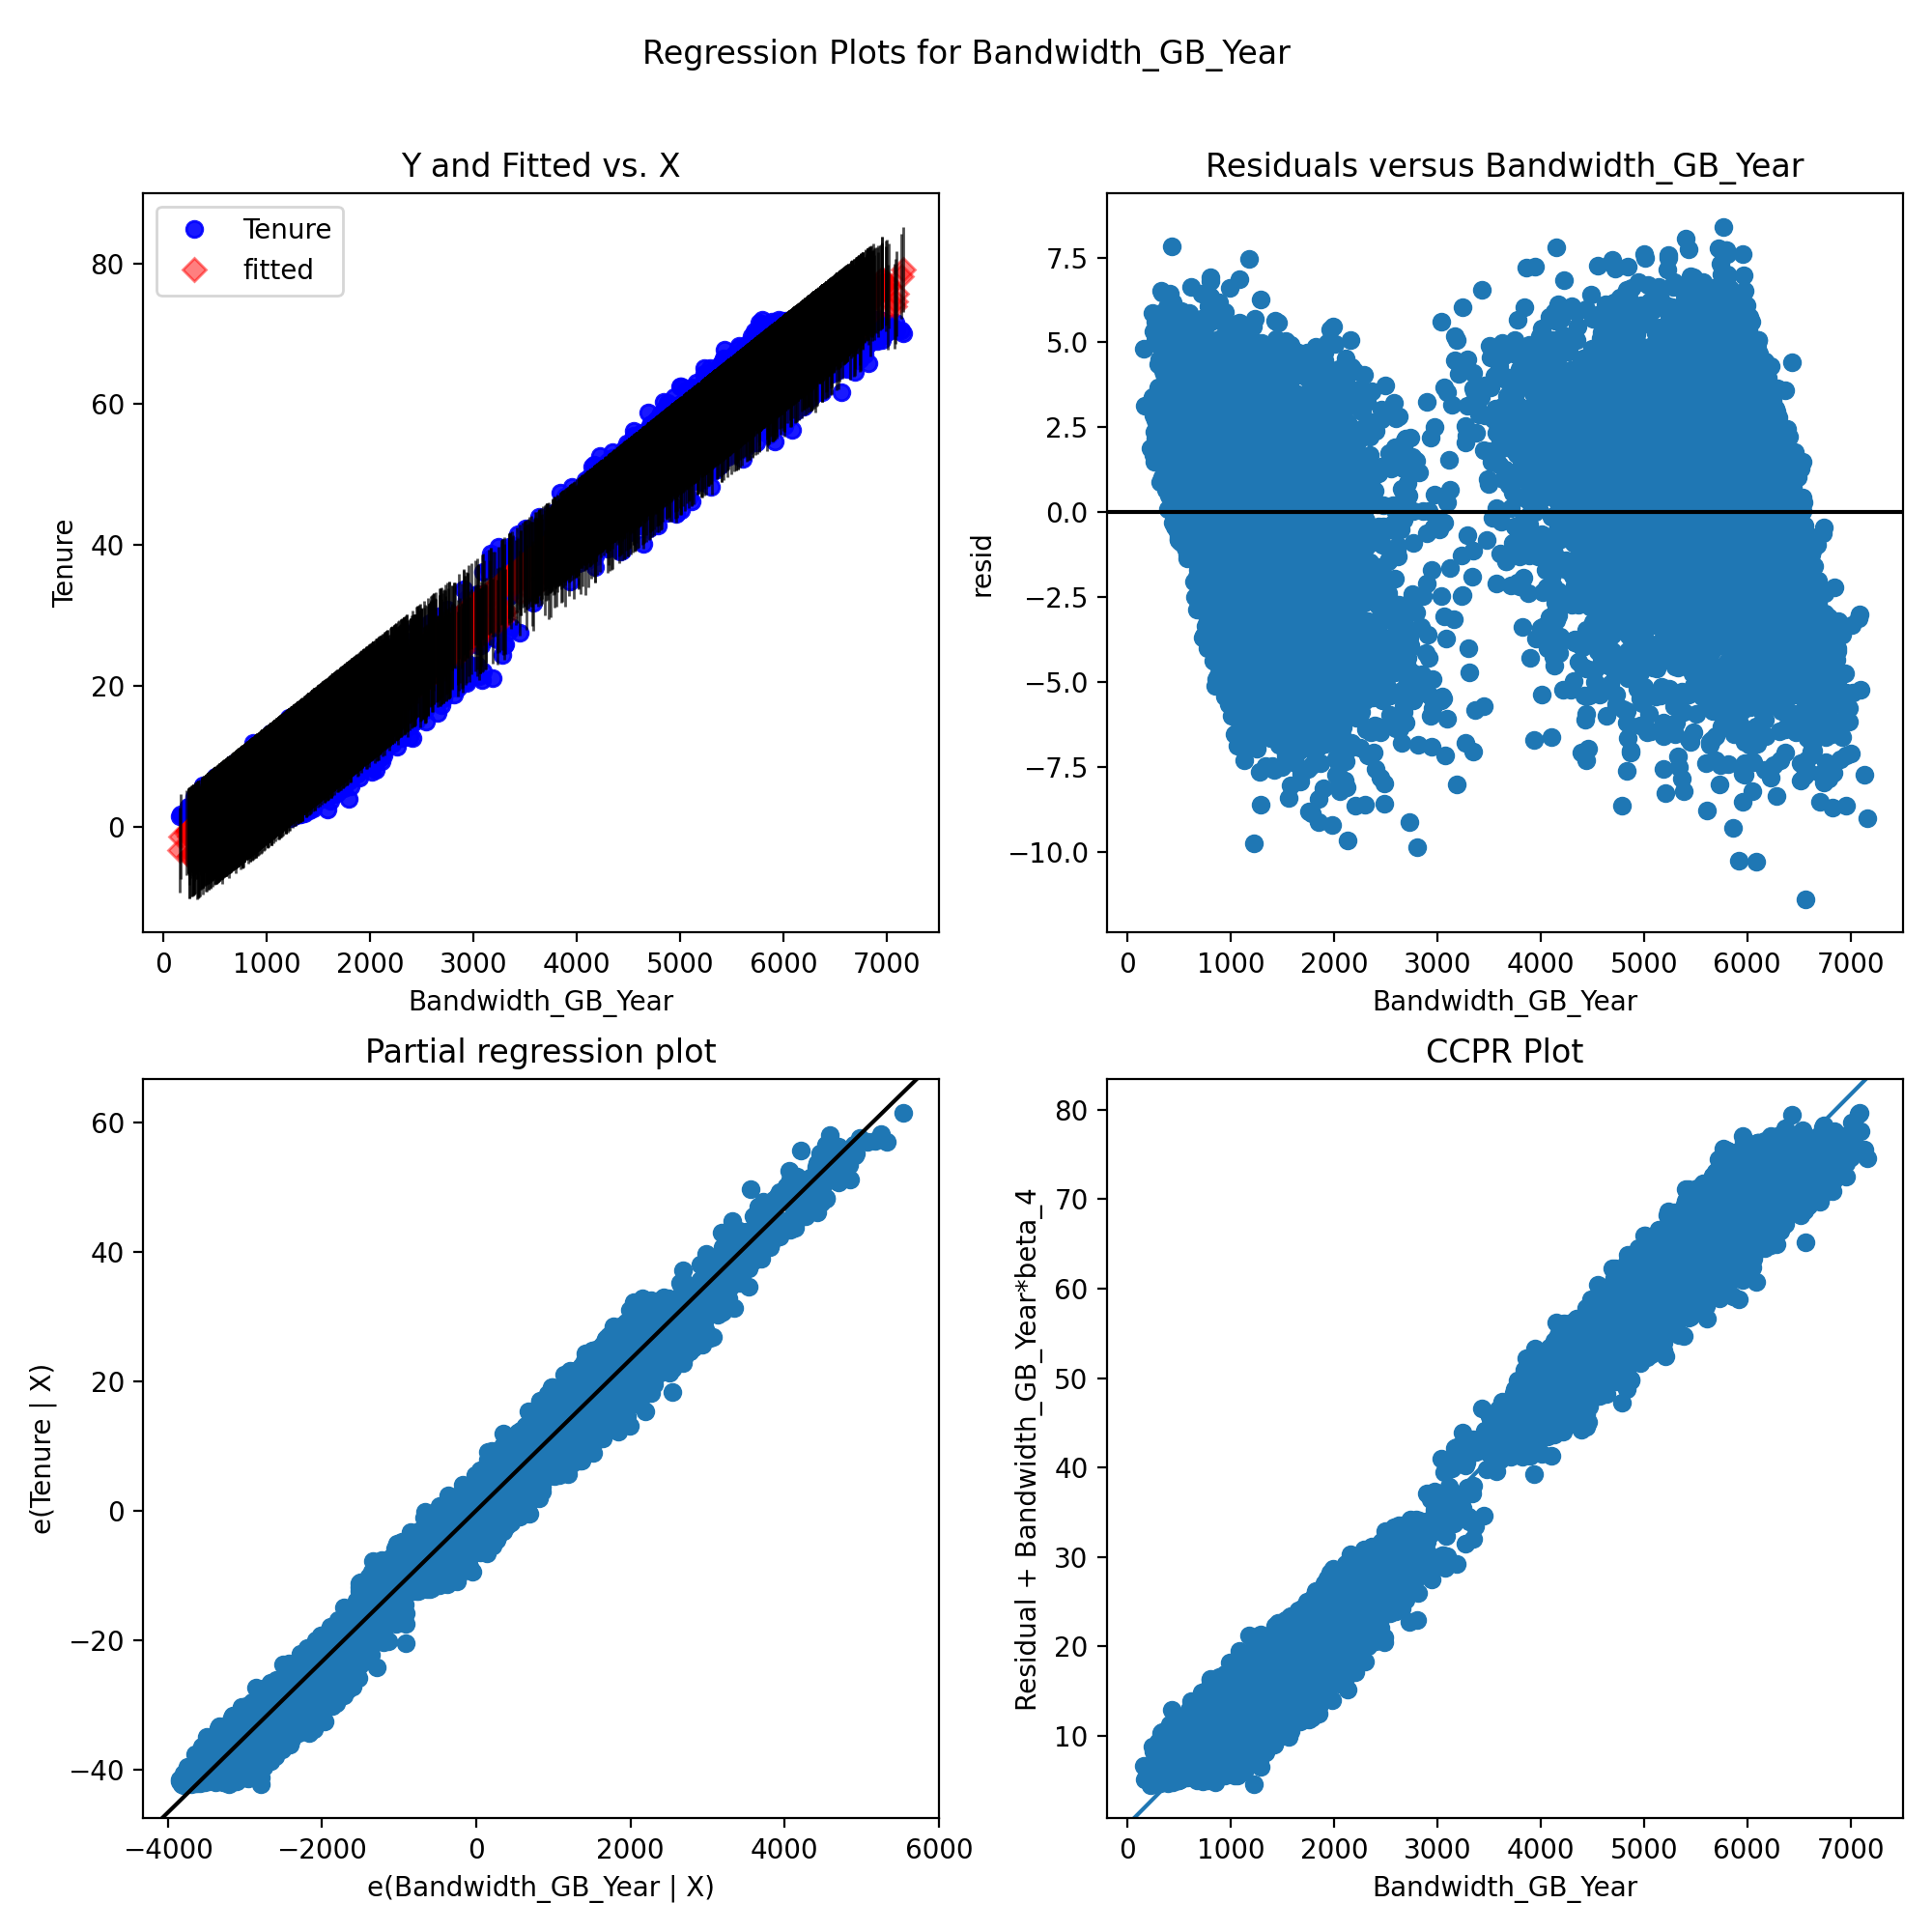

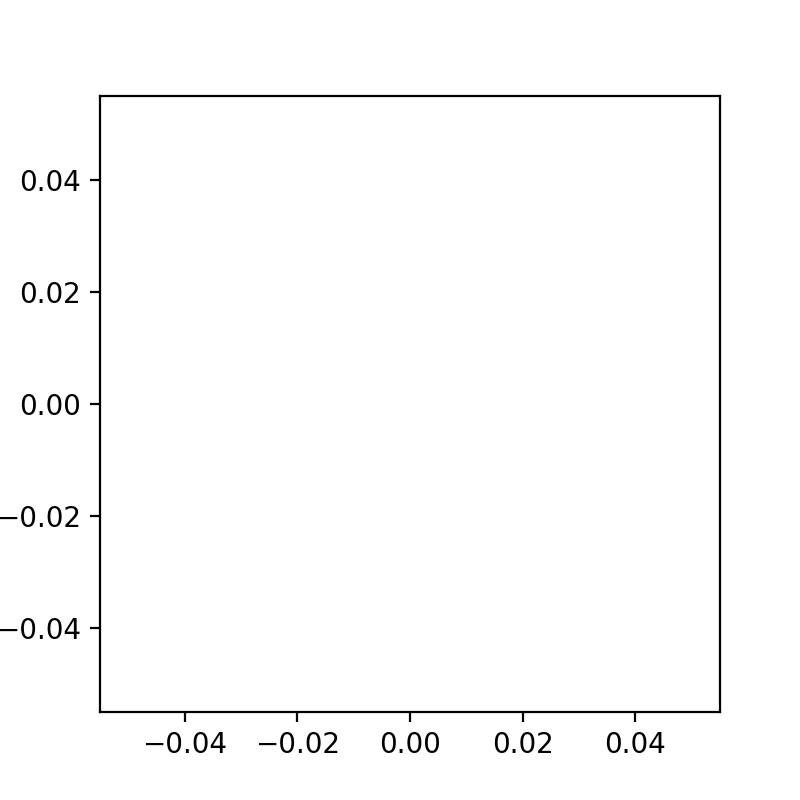

In [12]:
#Part E2

fig = plt.figure(figsize=(10, 10))

# creating regression plots
fig = sm.graphics.plot_regress_exog(mlr_model, 'Bandwidth_GB_Year', fig=fig)